In [14]:
# Importing Necessary Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn for better visualization
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Step 1: Load the Dataset

In [15]:
# Reading the data using pandas
data = pd.read_csv('mnist_train.csv')

In [16]:
# Display the first five rows of the dataset to understand its structure

print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


### Step 2: Extract Labels and Features

In [18]:
# The 'label' column contains the digit labels (0-9)
labels = data['label']
labels.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [19]:
# Drop the label column to keep only pixel data
d = data.drop(columns=['label'])

### Step 3: Standardizing the Data


In [20]:
# StandardScaler helps normalize the data so that TSNE works effectively
scaler = StandardScaler()
standardized_data = scaler.fit_transform(d)  # Standardizing only pixel values

In [21]:
print("Shape of standardized data:", standardized_data.shape)

Shape of standardized data: (60000, 784)


### Step 4: Selecting a Subset of Data for t-SNE


In [22]:
# TSNE is computationally expensive, so we take only the first 1000 samples
data_1000 = standardized_data[:1000, :]
labels_1000 = labels[:1000]

### Step 5: Applying t-SNE for Dimensionality Reduction


In [23]:
# t-SNE reduces high-dimensional data into 2D for visualization
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_1000)

### Step 6: Creating a DataFrame for Visualization


In [24]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T  # Combining TSNE results with labels
tsne_df = pd.DataFrame(data=tsne_data, columns=["Dim_1", "Dim_2", "label"])

### Step 7: Plotting the t-SNE Results


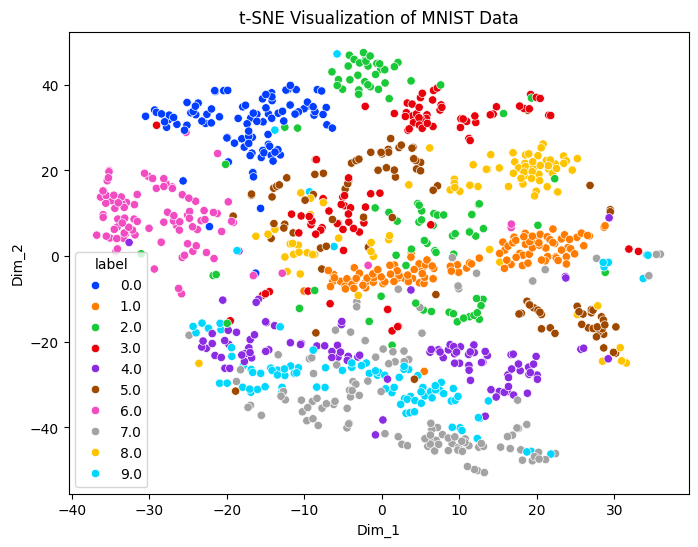

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette='bright')
plt.title('t-SNE Visualization of MNIST Data')
plt.show()